# Math599 2025S Final Exam


Please read the instructions carefully:

1. Write your **name** and **Student ID #** first.  
2. Write down your answers **on the exam paper**; no need to write down the code.    
3. You are allowed to use the internet, but you are **NOT allowed to communicate** with others in any form.
4. **Do NOT use your cell phone**, use the computer instead.
5. Different problems might use same variable names.  Make sure you use the right one to answer the problem.
6. If the answer is too long, write **two digits after the decimal point**.

---


### Problem 1 (3pt)

Please train a `KNN` with $k=3$.

Use the **samples with odd-numbered indices** (i.e., index 1, 3, 5, ..., 149) from the Iris dataset as the **training set**.

Then, predict the class label of the sample at **index 50**(i.e., `iris.data[50]`) .

What is the predicted class label for the sample at index 50?



In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

iris = load_iris()
X_train= iris.data[1:150:2]
y_train = iris.target[1:150:2]
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
X_test = iris.data[0:150:2]
y_test = iris.target[0:150:2]
predicted = model.predict([iris.data[50]])
print(predicted)

[1]


### Problem 2 (3pt)

After applying `PCA` with `n_components=2` on the Iris dataset, how much percentage of the variance is explained? (round to 2 decimal places)


In [ ]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
iris = load_iris()
x= iris.data
y= iris.target
pca = PCA(n_components=2)
pca.fit(x)
explained_variance = pca.explained_variance_ratio_.sum() * 100
print(round(explained_variance, 2))

       


97.77


In [ ]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
iris = load_iris()
x= iris.data
y= iris.target
model = PCA(n_components=2)
model.fit(x)

explained_variance_ratio = model.explained_variance_ratio_
print("Explained variance ratio:", explained_variance_ratio)


Explained variance ratio: [0.92461872 0.05306648]


### Problem 3 (2pt)

Compare `KNN` and `Decision Tree` classifiers.  
List **one advantage** and **one disadvantage** for each model.



### Problem 4 (3pt)

Use the `make_moons()` dataset with `n_samples=200` and `noise=0.2`.

Split the data into a training set and a test set.
```python
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
X, y = make_moons(n_samples=200, noise=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
```

Train two `SVC` classifiers:
- One with `kernel='linear'`
- One with `kernel='rbf'`

Evaluate both models on the test set.  
**Which kernel gives better test accuracy?**  
(Answer with `'linear'` or `'rbf'`)

In [68]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
X, y = make_moons(n_samples=200, noise=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
from sklearn.svm import SVC
model1 = SVC(kernel='rbf')
model2 = SVC(kernel='linear')
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
from sklearn.metrics import accuracy_score
y_pred1 = model1.predict(X_test)
y_pred2 = model2.predict(X_test)
accuracy1 = accuracy_score(y_test, y_pred1)
accuracy2 = accuracy_score(y_test, y_pred2)
print("Accuracy of RBF kernel SVM:", accuracy1)
print("Accuracy of Linear kernel SVM:", accuracy2)

Accuracy of RBF kernel SVM: 0.96
Accuracy of Linear kernel SVM: 0.82


### Problem 5 (4pt)


Use `make_blobs()` to generate 3 clusters with different standard deviations:

```python
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=400, centers=3,
                       cluster_std=[1.0, 2.5, 0.5], random_state=42)
```

Train the following two models:
- `KMeans(n_clusters=3, random_state=42)`
- `GaussianMixture(n_components=3, random_state=42)`

Then:

1. Create two scatter plots:
   - One where each point is colored by its **KMeans** cluster assignment.
   - One where each point is colored by its **GMM** cluster assignment.
2. On your answer sheet, reproduce both cluster plots **by hand** or using a plotting tool.  
   - Use the images below to **circle the clusters given by KMeans and GMM**.
 
   
**How many points were clustered differently by the two models?**


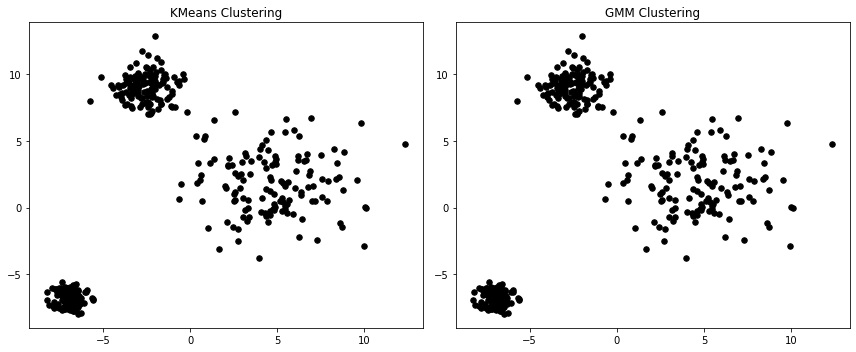

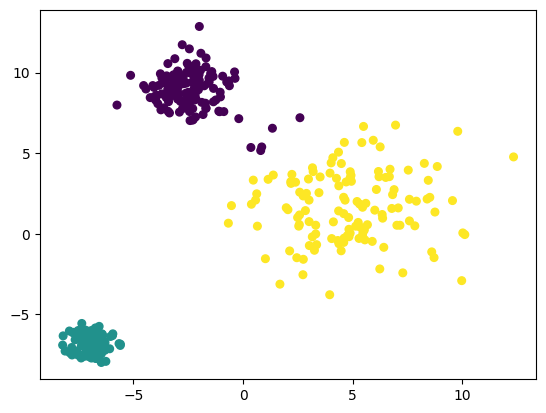

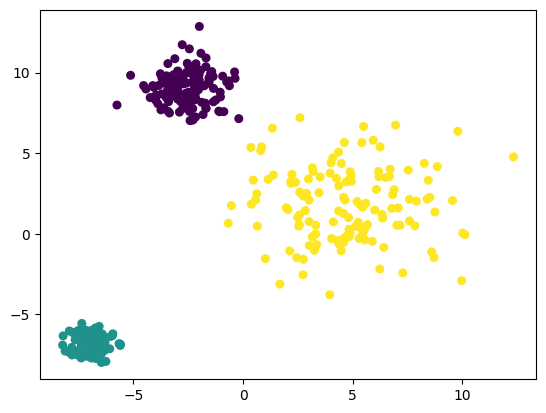

In [71]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
X, y_true = make_blobs(n_samples=400, centers=3,cluster_std=[1.0, 2.5, 0.5], random_state=42)
model1=KMeans(n_clusters=3, random_state=42)
model2=GaussianMixture(n_components=3, random_state=42)
model1.fit(X)
model2.fit(X)
y_kmeans = model1.predict(X)
y_gmm = model2.predict(X)
# plt.scatter(X[:, 0], X[:, 1], c=y_true, s=30, cmap='viridis')
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=30, cmap='viridis', marker='o')
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y_gmm, s=30, cmap='viridis', marker='o')



### Problem 6 (3pt)

Train a `DecisionTreeClassifier` using the `load_iris()` dataset with the following settings:

- `max_depth = 3`
- `random_state = 42`

Use `plot_tree()` from `sklearn.tree` to visualize the tree.

**List the feature name used for splitting at each internal node, along with its threshold.**  
(You can list them in top-down order as shown in the tree diagram.)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

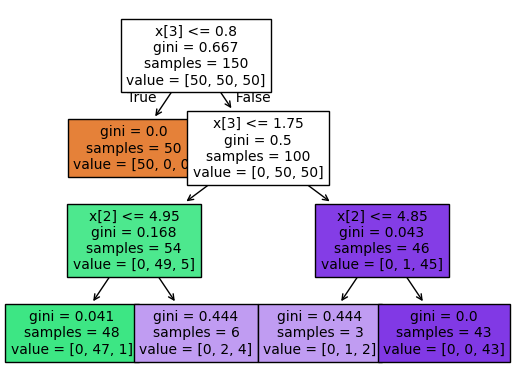

petal length (cm) petal width (cm)


In [123]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target
print(X,y)
model = DecisionTreeClassifier(max_depth=3,min_samples_split=42)
model.fit(X, y)
plot_tree(model, filled=True,fontsize=10)
plt.show()
features = iris.feature_names
print(features[2],features[3])

# Problem 7 (3pt)
 Using matplotlib.pyplot, visualize the given binary matrix as an image—with entries of 1 rendered in white and entries of 0 rendered in black—and describe what the resulting plot looks like.
```
matrix = np.array([
    [1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1],
    [1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
    [1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
    [1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1],
    [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1],
    [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1],
    [1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0],
])
```

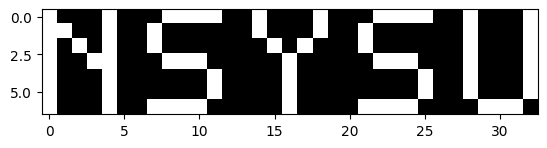

In [15]:
import numpy as np
matrix = np.array([
    [1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1],
    [1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
    [1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
    [1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1],
    [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1],
    [1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1],
    [1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0],
])

plt.imshow(matrix, cmap='gray', interpolation='nearest')

# Problem 8 (3pt)

Use the dataset:

```python
X = np.array([-1,0,1,0,1,1,1,-1]).reshape(4,2)
y = np.array([0,1,1,1])
```

Train the `GaussianNB` model with `X` and `y` using the default hyperparameters.  
Draw the decision boundary on the picture below.

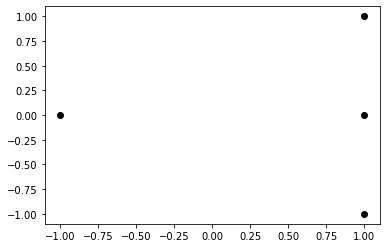

C:\Users\User\AppData\Local\Temp\ipykernel_13076\4156221742.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.get_cmap('rainbow', 10), s=20)
C:\Users\User\AppData\Local\Temp\ipykernel_13076\4156221742.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  plt.contourf(xx, yy, Z, alpha=0.5, cmap=plt.cm.get_cmap('rainbow', 10))


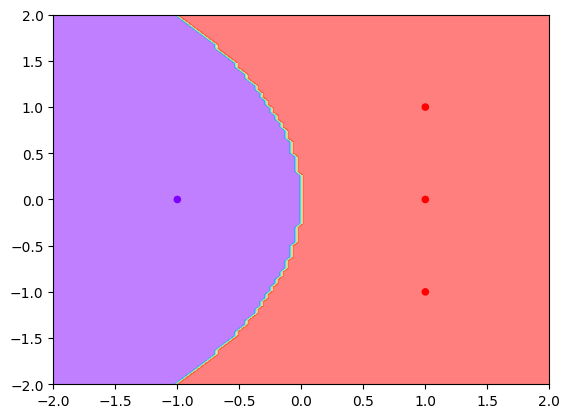

In [16]:
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
X = np.array([-1,0,1,0,1,1,1,-1]).reshape(4,2)
y = np.array([0,1,1,1])
model = GaussianNB()
model.fit(X, y)

x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1


xx, yy = np.meshgrid(np.linspace(x1_min, x1_max, 100), 
                     np.linspace(x2_min, x2_max, 100))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.get_cmap('rainbow', 10), s=20)
plt.contourf(xx, yy, Z, alpha=0.5, cmap=plt.cm.get_cmap('rainbow', 10))

# Problem 9 (3pt)


Consider a dataset of four points on a plane $(0,0)$, $(1,0)$, $(2,1)$, $(3,1)$.  
Find the best fitting line for the dataset using linear regression.  
What are the slope and the intercept?

[0.4]
-0.09999999999999987


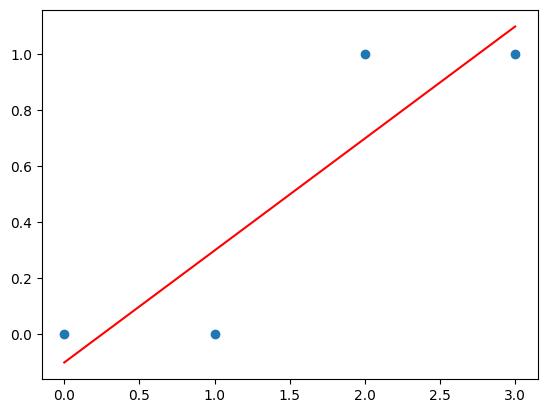

In [129]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(1)
x=np.array([0,1,2,3])
y=np.array([0,0,1,1])
plt.scatter(x, y)
model = LinearRegression(fit_intercept=True)
model.fit(x[:,np.newaxis], y)
print(model.coef_)
print(model.intercept_)
plt.plot(x, model.predict(x[:,np.newaxis]), color="red")


# Problem 10 (3pt)


Let  

```python
X = np.array([-2]*10 + [2]*90)[:,np.newaxis]
```

Train a KernelDensity model using the `tophat` kernel and `bandwidth=1.0`.  
Draw the distribution.

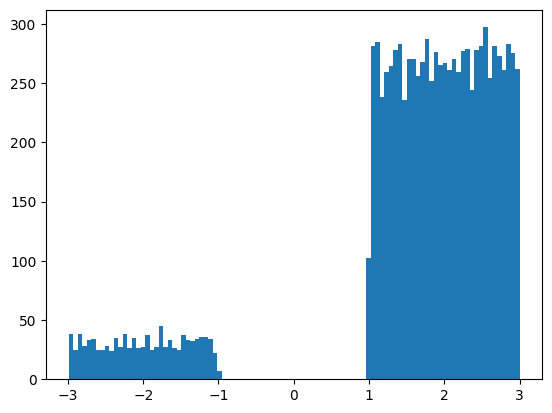

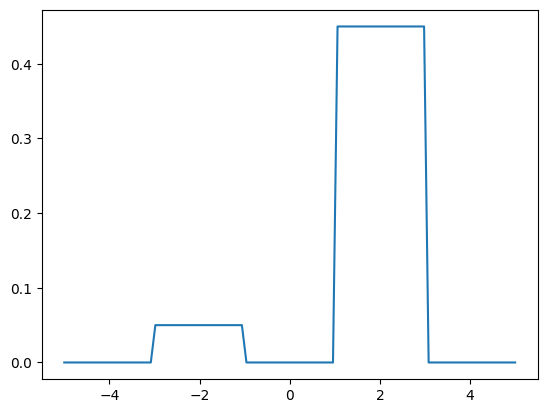

In [ ]:
from sklearn.neighbors import KernelDensity
kde = KernelDensity(kernel='tophat',bandwidth=1.0)
X = np.array([-2]*10 + [2]*90)[:,np.newaxis]
kde.fit(X)
X_new = kde.sample(10000)
plt.hist(X_new, bins=100)
plt.figure()
x = np.linspace(-5, 5, 100)
X_test = x[:,np.newaxis] 
log_prob = kde.score_samples(X_test) 
plt.plot(x, np.exp(log_prob))

### Problem 11 (extra 3pt)

Consider the data points:

```python
x = np.linspace(0,10,100)
y = np.sin(x - 2)
```

Find $a$ and $b$ such that $y = a \sin(x) + b \cos(x)$ best describes the data points.

In [ ]:
import numpy as np
from scipy.optimize import curve_fit
def model_func(x, a, b):
    return a * np.sin(x) + b * np.cos(x)
x = np.linspace(0, 10, 100)
y = np.sin(x - 2)
params, _ = curve_fit(model_func, x, y)
a, b = params
print(f"a: {a}, b: {b}")



a: -0.4161468365471424, b: -0.9092974268256817
